### • Goal: Learn and use different models to solve a multi-class classification problem.
### • Background: This data collects personal information of clients. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts
### • Author: Dhyey Dharmendrakumar Mavani

In [1]:
# checking the current working directory access
import os
print(os.getcwd()) 

/Users/dhyeymavani/Library/CloudStorage/GoogleDrive-dmavani25@amherst.edu/My Drive/Columbia VUS/SPRING2023/MATH GR 5430 MACHINE LEARNING FOR FINANCE/ML_Finance_HW2


# 1. Setup and Data Fetching (5 points)

In [2]:
# importing the data from the given csv (with cols separated by ";")
import pandas as pd
import numpy as np
client_data = pd.read_csv("./HW2.csv")
client_data

/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_27457/3103777598.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  client_data = pd.read_csv("./HW2.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


# 2. Exploratory Data Analysis (20 points)

#### • Data cleaning: Some features have missing or invalid values. Choose the way you see as appropriate to clean the dataframe so that there are no missing or invalid values.

In [3]:
client_data_after_dropping_nas = client_data.dropna()
client_data_after_dropping_nas.reset_index(inplace = True)

for i in range(len(client_data_after_dropping_nas['Age'])):
    alpha_num_str = client_data_after_dropping_nas['Age'][i]
    num_str = '' .join((z for z in alpha_num_str if z.isdigit()))
    client_data_after_dropping_nas.iat[i, 5] = num_str

client_data_after_dropping_nas["Age"] = client_data_after_dropping_nas["Age"].astype(int)
temp_age_filtered_client_data = client_data_after_dropping_nas[client_data_after_dropping_nas['Age'] < 100]
age_filtered_client_data = temp_age_filtered_client_data[temp_age_filtered_client_data['Age'] > 0]

occupation_filtered_client_data = age_filtered_client_data[age_filtered_client_data['Occupation'] != "_______"]

del occupation_filtered_client_data['index']

occupation_filtered_client_data = occupation_filtered_client_data.reset_index()

for i in range(len(occupation_filtered_client_data['Annual_Income'])):
    alpha_num_str = occupation_filtered_client_data['Annual_Income'][i]
    num_str = '' .join((z for z in alpha_num_str if (z.isdigit() or z == ".")))
    head, sep, tail = num_str.partition('.')
    occupation_filtered_client_data.iat[i, 8] = head

occupation_filtered_client_data['Annual_Income'] = occupation_filtered_client_data['Annual_Income'].astype(int)

del occupation_filtered_client_data['index']

occupation_filtered_client_data = occupation_filtered_client_data.reset_index()

for i in range(len(occupation_filtered_client_data['Num_of_Loan'])):
    alpha_num_str = occupation_filtered_client_data['Num_of_Loan'][i]
    num_str = '' .join((z for z in alpha_num_str if (z.isdigit())))
    head, sep, tail = num_str.partition('_')
    occupation_filtered_client_data.iat[i, 13] = num_str

occupation_filtered_client_data["Num_of_Loan"] = occupation_filtered_client_data["Num_of_Loan"].astype(int)

loan_filtered_client_data = occupation_filtered_client_data[occupation_filtered_client_data["Num_of_Loan"] >= 0]
loan_filtered_client_data = loan_filtered_client_data[loan_filtered_client_data["Num_of_Loan"] <= 10]

bank_acc_filtered_client_data = loan_filtered_client_data[loan_filtered_client_data["Num_Bank_Accounts"] >= 0]
bank_acc_filtered_client_data = bank_acc_filtered_client_data[bank_acc_filtered_client_data["Num_Bank_Accounts"] <= 10]

credit_card_filtered_client_data = bank_acc_filtered_client_data[bank_acc_filtered_client_data["Num_Credit_Card"] >= 0]
credit_card_filtered_client_data = credit_card_filtered_client_data[credit_card_filtered_client_data["Num_Credit_Card"] <= 10]

interest_filtered_client_data = credit_card_filtered_client_data[credit_card_filtered_client_data["Interest_Rate"] >= 0]
interest_filtered_client_data = interest_filtered_client_data[interest_filtered_client_data["Interest_Rate"] <= 35]

delay_filtered_client_data = interest_filtered_client_data[interest_filtered_client_data["Delay_from_due_date"] >= 0]
delay_filtered_client_data = delay_filtered_client_data[delay_filtered_client_data["Delay_from_due_date"] <= 65]

del delay_filtered_client_data['index']

delay_filtered_client_data = delay_filtered_client_data.reset_index()

for i in range(len(delay_filtered_client_data["Num_of_Delayed_Payment"])):
    alpha_num_str = delay_filtered_client_data["Num_of_Delayed_Payment"][i]
    num_str = '' .join((z for z in alpha_num_str if (z.isdigit())))
    head, sep, tail = num_str.partition('_')
    delay_filtered_client_data.iat[i, 16] = head

delay_filtered_client_data["Num_of_Delayed_Payment"] = delay_filtered_client_data["Num_of_Delayed_Payment"].astype(int)

delayed_pay_filtered_client_data = delay_filtered_client_data[delay_filtered_client_data["Num_of_Delayed_Payment"] >= 0]
delayed_pay_filtered_client_data = delayed_pay_filtered_client_data[delayed_pay_filtered_client_data["Num_of_Delayed_Payment"] <= 25]

del delayed_pay_filtered_client_data['index']

delayed_pay_filtered_client_data = delayed_pay_filtered_client_data.reset_index()
delayed_pay_filtered_client_data.replace("_", np.nan, inplace=True)
delayed_pay_filtered_client_data.dropna(inplace=True)

delayed_pay_filtered_client_data["Changed_Credit_Limit"] = delayed_pay_filtered_client_data["Changed_Credit_Limit"].astype(float)

cred_inq_filtered_client_data = delayed_pay_filtered_client_data[delayed_pay_filtered_client_data["Num_Credit_Inquiries"] >= 0]
cred_inq_filtered_client_data = cred_inq_filtered_client_data[cred_inq_filtered_client_data["Num_Credit_Inquiries"] <= 25]

credit_mix_filtered_client_data = cred_inq_filtered_client_data[cred_inq_filtered_client_data['Credit_Mix'] != "_"]

del credit_mix_filtered_client_data['index']

credit_mix_filtered_client_data = credit_mix_filtered_client_data.reset_index()

for i in range(len(credit_mix_filtered_client_data['Outstanding_Debt'])):
    alpha_num_str = credit_mix_filtered_client_data['Outstanding_Debt'][i]
    num_str = '' .join((z for z in alpha_num_str if (z.isdigit() or z == ".")))
    head, sep, tail = num_str.partition('_')
    credit_mix_filtered_client_data.iat[i, 20] = head

credit_mix_filtered_client_data['Outstanding_Debt'] = credit_mix_filtered_client_data['Outstanding_Debt'].astype(float)

del credit_mix_filtered_client_data['index']

credit_mix_filtered_client_data = credit_mix_filtered_client_data.reset_index()

for i in range(len(credit_mix_filtered_client_data['Credit_History_Age'])):
    alpha_num_str = credit_mix_filtered_client_data['Credit_History_Age'][i]
    res = [float(i) for i in alpha_num_str.split() if i.isdigit()]
    y, m = res
    age = (y + m/12)
    credit_mix_filtered_client_data.iat[i, 22] = age
    
credit_mix_filtered_client_data['Credit_History_Age'] = credit_mix_filtered_client_data['Credit_History_Age'].astype(float)
    
credit_mix_filtered_client_data.replace("NM", np.nan, inplace=True)
credit_mix_filtered_client_data.dropna(inplace=True)

credit_mix_filtered_client_data.replace("__10000__", "10000.00", inplace=True)
credit_mix_filtered_client_data['Amount_invested_monthly'] = credit_mix_filtered_client_data['Amount_invested_monthly'].astype(float)

credit_mix_filtered_client_data.replace("!@9#%8", np.nan, inplace=True)
credit_mix_filtered_client_data.dropna(inplace=True)

credit_mix_filtered_client_data.replace("__-333333333333333333333333333__", np.nan, inplace=True)
credit_mix_filtered_client_data.dropna(inplace=True)
credit_mix_filtered_client_data['Monthly_Balance'] = credit_mix_filtered_client_data['Monthly_Balance'].astype(float)

cleaned_client_data = credit_mix_filtered_client_data.copy()

del cleaned_client_data['index']

cleaned_client_data = cleaned_client_data.reset_index()

del cleaned_client_data['index']

cleaned_client_data

/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_27457/3187363897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data_after_dropping_nas["Age"] = client_data_after_dropping_nas["Age"].astype(int)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
1,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
2,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,34.977895,26.916667,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
3,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,33.381010,27.000000,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
4,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,32.933856,27.166667,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903,3468.315833,0,...,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,493.341182,Good
26524,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.008333,1,...,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
26525,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.008333,1,...,Good,620.64,32.803431,29.833333,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
26526,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002,1929.906667,10,...,Bad,3571.70,39.772607,5.750000,Yes,12112.000000,148.275233,Low_spent_Small_value_payments,273.750662,Poor


In [4]:
cleaned_client_data.to_csv("clean_client_data.csv")

##### Columns in the cleaned data:
- 'Unnamed: 0'
- 'ID'
- 'Customer_ID'
- 'Month'
- 'Name'
- 'Age'
- 'SSN'
- 'Occupation'
- 'Annual_Income'
- 'Monthly_Inhand_Salary'
- 'Num_Bank_Accounts'
- 'Num_Credit_Card'
- 'Interest_Rate'
- 'Num_of_Loan'
- 'Type_of_Loan'
- 'Delay_from_due_date'
- 'Num_of_Delayed_Payment'
- 'Changed_Credit_Limit'
- 'Num_Credit_Inquiries'
- 'Credit_Mix'
- 'Outstanding_Debt'
- 'Credit_Utilization_Ratio'
- 'Credit_History_Age'
- 'Payment_of_Min_Amount'
- 'Total_EMI_per_month'
- 'Amount_invested_monthly'
- 'Payment_Behaviour'
- 'Monthly_Balance'
- 'Credit_Score'

In [5]:
data = pd.read_csv("./clean_client_data.csv")
del data["Unnamed: 0"]
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
1,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
2,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,34.977895,26.916667,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
3,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,33.381010,27.000000,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
4,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847,3037.986667,2,...,Good,605.03,32.933856,27.166667,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903,3468.315833,0,...,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,493.341182,Good
26524,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.008333,1,...,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
26525,0x25fcf,CUS_0xaf61,February,Chris Wickhamm,49,133-16-7738,Writer,37188,3097.008333,1,...,Good,620.64,32.803431,29.833333,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
26526,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002,1929.906667,10,...,Bad,3571.70,39.772607,5.750000,Yes,12112.000000,148.275233,Low_spent_Small_value_payments,273.750662,Poor


#### • Plot the distributions of two numerical features of your choice. What do you discover about those variables?

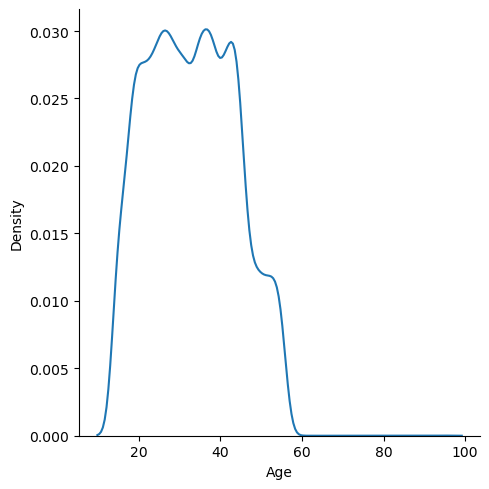

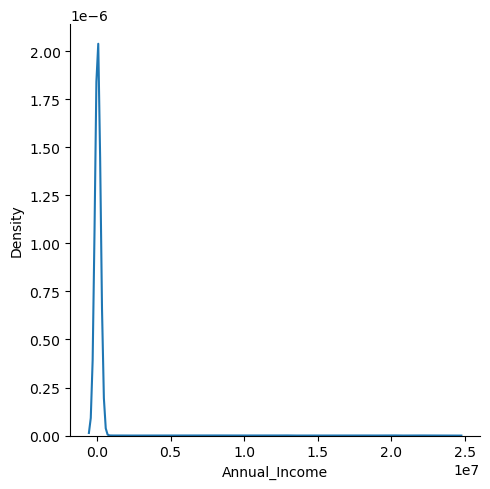

In [6]:
import seaborn as sns
sns.displot(data, x="Age", kind="kde")
sns.displot(data, x="Annual_Income", kind="kde")

We have chosen here to plot the density distributions of numeric variables age and annual income in our filtered dataset. We can see that both the distributions are right-skewed, while that of annual income is more so. Furthermore, we can see that the age with most density is around three peaks at 25, 38 and 42 approximately, while the density of annual income variable peaks when annual income takes a value of 0.05*10^7 (around 50,000). We can also see that age mostly lies between 10 to 60, while campaign values mostly lie between 0 to 1,000,000.

<AxesSubplot: xlabel='Age', ylabel='Annual_Income'>

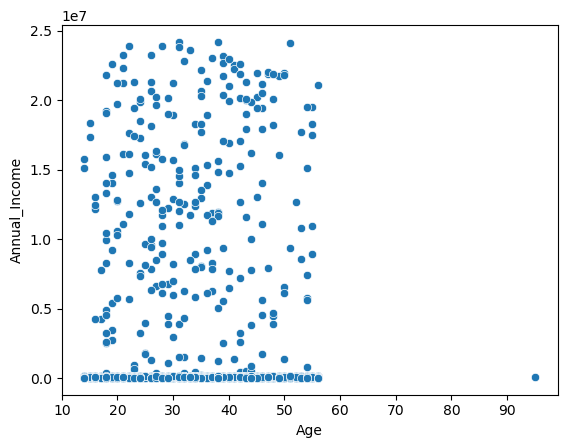

In [36]:
sns.scatterplot(data=data, x="Age", y="Annual_Income")

Furthermore, on plotting the numeric variables of interest as a scatterplot with annual income on the y-axis and age on x-axis as shown above, we can see that annual income has almost the same seemingly random variation among different ages from 15 to 60 with most people in the low annual income range.

#### • Plot the correlation matrix of all numeric features. What do you discover?

In [7]:
data.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.009402,0.085716,-0.191913,-0.150085,-0.217417,-0.196767,-0.170238,-0.182203,-0.154947,-0.243182,-0.200344,0.022428,0.232788,0.000514,-0.004075,0.108362
Annual_Income,0.009402,1.000000,0.035314,-0.008823,-0.004909,-0.019732,-0.002397,-0.011910,-0.004452,-0.008059,-0.013630,-0.008690,0.009059,0.003094,-0.010581,-0.000604,0.020047
Monthly_Inhand_Salary,0.085716,0.035314,1.000000,-0.281451,-0.222464,-0.308845,-0.249267,-0.246699,-0.282958,-0.173013,-0.285780,-0.277441,0.159732,0.283447,0.010987,0.049266,0.680436
Num_Bank_Accounts,-0.191913,-0.008823,-0.281451,1.000000,0.440339,0.579838,0.469219,0.556531,0.595783,0.323093,0.526000,0.515963,-0.060204,-0.487774,0.005370,-0.013920,-0.284251
Num_Credit_Card,-0.150085,-0.004909,-0.222464,0.440339,1.000000,0.499532,0.417180,0.481129,0.413135,0.245925,0.468567,0.498871,-0.048869,-0.419828,-0.001450,-0.001580,-0.235929
Interest_Rate,-0.217417,-0.019732,-0.308845,0.579838,0.499532,1.000000,0.539941,0.584251,0.561430,0.355906,0.633609,0.633570,-0.066029,-0.576757,0.003615,-0.010806,-0.318435
Num_of_Loan,-0.196767,-0.002397,-0.249267,0.469219,0.417180,0.539941,1.000000,0.490506,0.463587,0.367170,0.544718,0.640329,-0.077027,-0.596080,-0.000914,-0.019284,-0.406558
Delay_from_due_date,-0.170238,-0.011910,-0.246699,0.556531,0.481129,0.584251,0.490506,1.000000,0.537229,0.286690,0.539331,0.578490,-0.054367,-0.487857,-0.005720,-0.004256,-0.267302
Num_of_Delayed_Payment,-0.182203,-0.004452,-0.282958,0.595783,0.413135,0.561430,0.463587,0.537229,1.000000,0.315604,0.497532,0.505241,-0.062507,-0.481429,-0.007373,-0.024517,-0.294056
Changed_Credit_Limit,-0.154947,-0.008059,-0.173013,0.323093,0.245925,0.355906,0.367170,0.286690,0.315604,1.000000,0.368664,0.464225,-0.038766,-0.425295,0.001202,-0.007301,-0.195844


We can see that some of the correlations are unusually high, for example, 0.680436 (close to or greater than 0.6) between monthly balance and monthly inhand salary. This might be causing multi-collinearity issues down the line. Some of the solutions which we can employ in this case range from removing the highly correlated independent variables to introducing a linear combination of the highly correlated independent variables instead of having them individually present as columns. I am deleting the column for monthly balance below to resolve this issue.

In [8]:
del data["Monthly_Balance"]

'''
We also delete the identifying information such as SSN, ID, Customer_ID, and Name
before converting our categorical variables to numerical encoding because we don't
want these columns to be encoded as this might cause overfitting and it might lead
to non-convergence issues with our model because each observation will take on a 
different value and number of categories will be very close to the total number of 
observations.
'''
del data["SSN"]
del data["ID"]
del data["Customer_ID"]
del data["Name"]

data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,July,23,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,Good
1,February,28,Teacher,34847,3037.986667,2,4,6,1,Credit-Builder Loan,...,2.0,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,Good
2,May,28,Teacher,34847,3037.986667,2,4,6,1,Credit-Builder Loan,...,2.0,Good,605.03,34.977895,26.916667,No,18.816215,130.115420,Low_spent_Small_value_payments,Good
3,June,28,Teacher,34847,3037.986667,2,4,6,1,Credit-Builder Loan,...,2.0,Good,605.03,33.381010,27.000000,No,18.816215,43.477190,High_spent_Large_value_payments,Good
4,August,28,Teacher,34847,3037.986667,2,4,6,1,Credit-Builder Loan,...,2.0,Good,605.03,32.933856,27.166667,No,18.816215,218.904344,Low_spent_Small_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,January,18,Lawyer,42903,3468.315833,0,4,6,1,Not Specified,...,1.0,Good,1079.48,27.289440,28.083333,No,50894.000000,78.514945,High_spent_Small_value_payments,Good
26524,January,49,Writer,37188,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",...,3.0,Good,620.64,39.080823,29.750000,No,84.205949,223.875018,Low_spent_Small_value_payments,Good
26525,February,49,Writer,37188,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",...,3.0,Good,620.64,32.803431,29.833333,No,84.205949,70.869970,High_spent_Large_value_payments,Good
26526,February,28,Architect,20002,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,9.0,Bad,3571.70,39.772607,5.750000,Yes,12112.000000,148.275233,Low_spent_Small_value_payments,Poor


#### • Appropriately encode all categorical features in the dataframe

In [9]:
data.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Credit_Score                 object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

# get the categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# create the label encoder object
label_encoder = LabelEncoder()

# apply label encoding to each categorical column
data[cat_cols] = data[cat_cols].apply(lambda col: label_encoder.fit_transform(col))

# print the encoded dataframe
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,4,23,12,19114,1824.843333,3,4,3,4,119,...,4.0,1,809.98,22.537593,22.583333,0,49.574949,178.344067,5,0
1,2,28,13,34847,3037.986667,2,4,6,1,649,...,2.0,1,605.03,38.550848,26.666667,0,18.816215,40.391238,0,0
2,7,28,13,34847,3037.986667,2,4,6,1,649,...,2.0,1,605.03,34.977895,26.916667,0,18.816215,130.115420,5,0
3,5,28,13,34847,3037.986667,2,4,6,1,649,...,2.0,1,605.03,33.381010,27.000000,0,18.816215,43.477190,0,0
4,1,28,13,34847,3037.986667,2,4,6,1,649,...,2.0,1,605.03,32.933856,27.166667,0,18.816215,218.904344,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,3,18,7,42903,3468.315833,0,4,6,1,3257,...,1.0,1,1079.48,27.289440,28.083333,0,50894.000000,78.514945,2,0
26524,3,49,14,37188,3097.008333,1,4,5,3,2335,...,3.0,1,620.64,39.080823,29.750000,0,84.205949,223.875018,5,0
26525,2,49,14,37188,3097.008333,1,4,5,3,2335,...,3.0,1,620.64,32.803431,29.833333,0,84.205949,70.869970,0,0
26526,2,28,1,20002,1929.906667,10,8,29,5,4636,...,9.0,0,3571.70,39.772607,5.750000,1,12112.000000,148.275233,5,1


In [11]:
data.dtypes

Month                         int64
Age                           int64
Occupation                    int64
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Credit_Score                  int64
dtype: object

# 3. Logistic Regression (20 points)

#### • What is the use of validation dataset in machine learning?

The validation dataset is a subset of the original dataset that is used to evaluate the performance of a model during training and to select the best hyperparameters.

During the training phase of a machine learning model, the model is trained on a training dataset, and its performance is evaluated on a validation dataset. The goal is to optimize the model's performance on the validation dataset while preventing overfitting to the training dataset. Overfitting occurs when the model learns the noise or the specifics of the training dataset too well, resulting in poor generalization to new, unseen data.

The validation dataset is used to tune the hyperparameters of the model, such as the learning rate, the number of layers, the number of hidden units, etc. Hyperparameters are model parameters that are not learned during training and must be set before training the model. By evaluating the model's performance on the validation dataset for different hyperparameter values, we can select the best hyperparameters that optimize the model's performance.

The main advantage of using a validation dataset is that it provides an unbiased estimate of the model's performance on unseen data. This estimate can be used to compare different models or to select the best hyperparameters for a given model. Without a validation dataset, it is difficult to estimate the model's performance on unseen data accurately, and we risk overfitting the model to the training data.

To summarize, the validation dataset is used in machine learning to:

- Evaluate the performance of the model during training
- Prevent overfitting of the model to the training data
- Tune the hyperparameters of the model
- Provide an unbiased estimate of the model's performance on unseen data.

#### • Make an appropriate split of the data train, validation, test and fit a multi-class logistic regression model using the Scikit-learn library.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Credit_Score', axis=1), data['Credit_Score'], test_size=0.2, random_state=8990)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8990)

# Fit the multi-class logistic regression model
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the classes of the validation set
y_val_pred = clf.predict(X_val)

# Calculate the validation set accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Predict the classes of the test set
y_test_pred = clf.predict(X_test)

# Calculate the test set accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation set accuracy: {val_accuracy:.3f}")
print(f"Test set accuracy: {test_accuracy:.3f}")


Validation set accuracy: 0.554
Test set accuracy: 0.543


#### • Print the classification report of the model. What do you find in the report?

In [23]:
from sklearn.metrics import classification_report

logistic_model_classification_report = classification_report(y_test, y_test_pred)

print(logistic_model_classification_report)

              precision    recall  f1-score   support

           0       0.35      0.01      0.02       854
           1       0.51      0.35      0.42      1626
           2       0.55      0.81      0.66      2826

    accuracy                           0.54      5306
   macro avg       0.47      0.39      0.36      5306
weighted avg       0.51      0.54      0.48      5306



This classification report is for a logistic regression model, which has been used to classify data into three classes (0, 1, and 2).

The report shows various metrics that evaluate the performance of the model. Here is a brief explanation of each metric:

- ___Precision:___ Precision measures the proportion of true positives (correctly predicted instances of a class) among the instances that the model predicted as positive. In this report, the precision for class 0 is very low at 0.35, indicating that the model has a high number of false positives for this class. The precision for class 1 and 2 are 0.51 and 0.55, respectively, indicating that the model is better at predicting these classes.

- ___Recall:___ Recall measures the proportion of true positives among the instances that actually belong to a class. In this report, the recall for class 0 is very low at 0.01, indicating that the model is not good at identifying instances of this class. The recall for class 1 and 2 are 0.35 and 0.81, respectively, indicating that the model is better at identifying these classes.

- ___F1-score:___ F1-score is a weighted average of precision and recall that takes into account both metrics. It is a good metric for evaluating the overall performance of a model. In this report, the F1-score for class 0 is very low at 0.02, indicating that the model is not good at predicting this class. The F1-scores for class 1 and 2 are 0.42 and 0.66, respectively, indicating that the model is better at predicting these classes.

- ___Support:___ Support indicates the number of instances of each class in the test set.

- ___Accuracy:___ Accuracy measures the proportion of correctly classified instances among all instances. In this report, the overall accuracy of the model is 0.54, indicating that the model is correct in its prediction for 54% of instances.

- ___Macro average:___ Macro average calculates the average metric score across all classes, giving equal weight to each class. In this report, the macro average F1-score is 0.36, indicating that the overall performance of the model is not very good.

- ___Weighted average:___ Weighted average calculates the average metric score across all classes, weighting each class by its support. In this report, the weighted average F1-score is 0.48, which is slightly better than the macro average F1-score but still indicates that the model's performance is not very good.

Overall, this classification report suggests that the logistic regression model is not very accurate at predicting class 0, and performs better at predicting classes 1 and 2. The overall performance of the model is also not very good, with a low macro average F1-score and accuracy of 54%.

# 4. Decision Tree and Bagging (30 points)

#### • Describe the algorithm CART. What are the advantages and disadvantages of CART?

CART (Classification And Regression Trees) is a decision tree algorithm used for both classification and regression tasks. The algorithm works by recursively splitting the data into two subsets, based on a single feature at a time, until the subsets are as homogeneous as possible in terms of the target variable.

_Here are the main steps of the CART algorithm:_

1. Select the feature that provides the best split. The feature with the highest information gain (for classification) or the highest reduction in variance (for regression) is chosen as the splitting feature.

2. Split the data into two subsets based on the chosen feature. The subsets are chosen such that each subset is as pure as possible with respect to the target variable.

3. Repeat steps 1 and 2 for each subset, until a stopping criterion is met. The stopping criterion could be a maximum depth of the tree, a minimum number of samples per leaf, or a minimum improvement in impurity.

4. Create a tree by assigning a label or value to each leaf node, based on the majority class (for classification) or the mean value (for regression) of the samples in the leaf node.

_Advantages of CART:_

1. CART is a simple and interpretable algorithm. The resulting decision tree can be easily visualized and understood, which is useful for explaining the reasoning behind the model's predictions.

2. CART can handle a mix of categorical and continuous features, making it versatile and applicable to a wide range of problems.

3. CART is a non-parametric algorithm, which means that it does not make any assumptions about the distribution of the data. This makes it useful when the data does not follow a specific distribution.

4. CART can handle missing values and outliers by using surrogate splits, which improve the robustness of the model.

_Disadvantages of CART:_

1. CART is prone to overfitting the data, which means that it can learn the noise or specific features of the training data too well, resulting in poor generalization to new, unseen data.

2. CART is sensitive to small variations in the data and can produce different trees for different splits, which makes the model less stable and harder to interpret.

3. CART is a greedy algorithm, which means that it makes the best split at each step without considering the overall structure of the tree. This can lead to suboptimal solutions.

4. CART can be biased towards features with many categories, as they can dominate the splitting process and result in an unbalanced tree.

Overall, CART is a powerful algorithm that can be used for a wide range of problems. However, to avoid overfitting and improve the performance of the model, it is important to tune the hyperparameters of the algorithm and use techniques such as pruning, regularization, and ensemble methods.

#### • Implement DecisionTreeClassifier from the sklearn library to train one decision tree. You can evaluate the accuracy of the validation set to tune model parameters. You should only evaluate your final accuracy on the test dataset.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train, validation, and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data.drop('Credit_Score', axis=1), data['Credit_Score'], test_size=0.2, random_state=8990)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=8990)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

# Evaluate the accuracy on the validation set to tune model parameters
val_pred = clf.predict(val_data)
val_acc = accuracy_score(val_labels, val_pred)
print("Validation accuracy:", val_acc)

# Evaluate the accuracy on the test set
test_pred = clf.predict(test_data)
test_acc = accuracy_score(test_labels, test_pred)
print("Test accuracy:", test_acc)


Validation accuracy: 0.6525323910482921
Test accuracy: 0.6515265736901621


#### • Use sklearn’s sklearn.tree.plot tree method and matplotlib to visualize your classification tree.

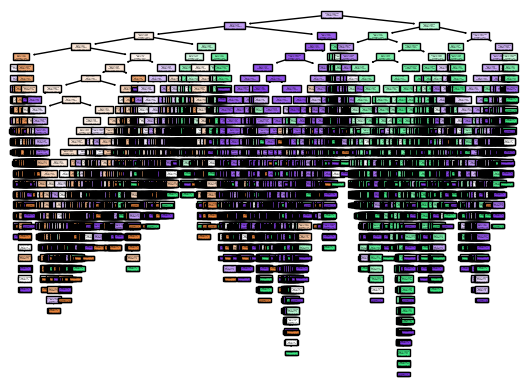

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure()
plot_tree(clf, filled=True)
plt.show()


#### • Use 30 different random seeds to train 30 identical decision trees and record the test accuracies. Calculate and report the average accuracy and standard deviation across the 30 runs. What do you find using this bagging method?

In [26]:
import numpy as np

# Define a function to train a decision tree using a given random seed
def train_decision_tree(seed, train_data, train_labels, test_data, test_labels):
    clf = DecisionTreeClassifier(random_state=seed)
    clf.fit(train_data, train_labels)
    test_pred = clf.predict(test_data)
    test_acc = accuracy_score(test_labels, test_pred)
    return test_acc

# Split data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data.drop('Credit_Score', axis=1), data['Credit_Score'], test_size=0.2, random_state=8990)

# Train 30 decision trees with different random seeds and record the test accuracies
test_accs = []
for seed in range(30):
    test_acc = train_decision_tree(seed, train_data, train_labels, test_data, test_labels)
    test_accs.append(test_acc)

# Calculate and report the average accuracy and standard deviation across the 30 runs
avg_acc = np.mean(test_accs)
std_dev = np.std(test_accs)
print("Average accuracy:", avg_acc)
print("Standard deviation:", std_dev)


Average accuracy: 0.6578967206935545
Standard deviation: 0.0030367385530887395


Bagging, or bootstrap aggregation, is a technique that involves training multiple models on different subsets of the training data and combining their predictions to obtain a final prediction. In this case, we are training identical decision trees on different subsets of the data by using different random seeds, and averaging their test accuracies to obtain an estimate of the overall accuracy of the model.

By using this bagging method, we can obtain a more robust estimate of the accuracy of the model, and reduce the impact of random variations in the data or the training process. The standard deviation across the 30 runs can give us an idea of the level of variability in the accuracy estimates, and help us assess the reliability of the model.

In this case specifically, we found that the standard deviation is very low and the average accuracy is close to the accuracy we obtained in the first run in the part before this.

# 5. Random Forest (25 points)

#### • What is the difference between bagging and random forest?

Bagging and random forests are both ensemble learning techniques that combine the predictions of multiple decision trees to improve the accuracy and robustness of the model. However, there are some differences between these two methods:

- ___Sampling method:___ Bagging and random forests use different sampling methods to generate the training sets for the individual decision trees. Bagging samples the training data with replacement to create multiple subsets, each of which is used to train a decision tree. Random forests also sample the features used to split the nodes of each decision tree, in addition to sampling the training data.


- ___Decision tree construction:___ Bagging and random forests use different techniques for constructing the individual decision trees. Bagging uses a standard decision tree algorithm, such as CART or ID3, to build each tree independently. Random forests use a modified version of the decision tree algorithm, where only a random subset of features is considered for each split, rather than all features.


- ___Prediction aggregation:___ Bagging and random forests use different methods for aggregating the predictions of the individual decision trees. Bagging usually takes a simple average of the predictions of all decision trees to generate the final prediction. Random forests use a majority vote or weighted average of the predictions, where the weight of each tree depends on its accuracy.


- ___Performance:___ Random forests tend to perform better than bagging, especially for high-dimensional datasets with many features, because they can reduce the variance and overfitting of the individual decision trees. Random forests also provide an estimate of the importance of each feature, which can be useful for feature selection and interpretation.


In summary, both bagging and random forests are powerful ensemble learning techniques that can improve the accuracy and robustness of decision tree models. However, random forests add an additional layer of randomness by sampling the features used to split the nodes, which can further reduce the variance and overfitting of the individual trees, and provide better performance for high-dimensional datasets.

#### • Why is it important for individual estimators in the random forest to have access to only a subset of all features?

In random forests, it is important for individual estimators (i.e., decision trees) to have access to only a subset of all features for several reasons:

- ___Reduces correlation:___ When decision trees are trained on all features, they tend to be highly correlated and make similar predictions, which can lead to overfitting and reduced performance. By limiting the number of features available to each tree, random forests can reduce the correlation between the trees and improve the diversity of the ensemble.


- ___Reduces overfitting:___ When there are many features in the dataset, individual trees can easily overfit the training data and perform poorly on unseen data. By using a random subset of features for each tree, random forests can reduce the overfitting and improve the generalization performance of the ensemble.


- ___Faster training:___ When there are many features in the dataset, training decision trees on all features can be computationally expensive and time-consuming. By using a random subset of features for each tree, random forests can reduce the training time and make the algorithm more scalable.


- ___Feature importance:___ Random forests can also provide an estimate of the importance of each feature in the dataset, based on how often they are used to split the nodes of the individual trees. By identifying the most important features, random forests can help with feature selection and interpretation, and improve the understanding of the underlying data.


In summary, limiting the number of features available to each decision tree in random forests can improve the diversity, generalization performance, training time, and interpretability of the ensemble, making it a powerful and widely used machine learning technique.

#### • Implement a random forest classifier to solve the classification problem again.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Credit_Score', axis=1), data['Credit_Score'], test_size=0.2, random_state=8990)

# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=8990)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7664907651715039


#### • Compare and contrast models from Section 3, 4 and 5.

Logistic regression, decision tree, and random forest are all popular machine learning algorithms used for classification tasks. Here are some key differences between these models:

- ___Model complexity:___ Logistic regression is a linear model that tries to find a linear boundary between classes, while decision trees and random forests can model more complex nonlinear boundaries. Random forests are a type of ensemble learning method that combines multiple decision trees, which can improve the accuracy and reduce overfitting compared to a single decision tree.


- ___Interpretability:___ Logistic regression is a simple and interpretable model that can provide coefficients that indicate the importance of each feature. Decision trees can also provide insights into the decision-making process by showing the split points for each feature. However, random forests can be more difficult to interpret due to the large number of trees and the ensemble nature of the model.


- ___Robustness to noise:___ Decision trees are susceptible to overfitting and can be sensitive to small changes in the training data. Random forests can reduce overfitting and improve generalization performance by using a subset of features and a bootstrap sampling technique. Logistic regression can also be susceptible to overfitting, but can be more robust to noisy features.


- ___Scalability:___ Logistic regression is a relatively fast and scalable algorithm, especially when the number of features is small. Decision trees and random forests can be slower and more computationally intensive, especially when the number of features and trees is large.


In terms of performance, the best algorithm depends on the specific dataset and problem at hand. Logistic regression can be effective when the relationship between the features and target is linear, while decision trees and random forests can handle more complex relationships. Random forests can often provide the highest accuracy and are robust to overfitting, but can be more difficult to interpret and slower to train.

In summary, logistic regression, decision tree, and random forest are all useful algorithms for classification tasks, but differ in terms of model complexity, interpretability, robustness to noise, and scalability. It is important to experiment with different algorithms and evaluate their performance on the specific dataset to determine the best model for the task at hand.






In this specific case, we can see that the Random Forests model gives us the highest accuracy of around 0.76. We also note that the accuracy of random forest model is almost 0.2 greater than that of logistic regression and almost 0.10 more than that obtained with the decision trees and bagging method. 